In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import legend
from pandas.conftest import axis_1

In [ ]:
df = pd.read_csv('../../DATA/penguins_size.csv')

In [ ]:
df = df.dropna()

In [ ]:
df.head()

In [ ]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [ ]:
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model_rfc = RandomForestClassifier(
    n_jobs=-1, 
    n_estimators=10, 
    max_features='sqrt',
    random_state=101,
)

In [15]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=101)

In [16]:
model_pred = model_rfc.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [19]:
confusion_matrix(y_test, model_pred)

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

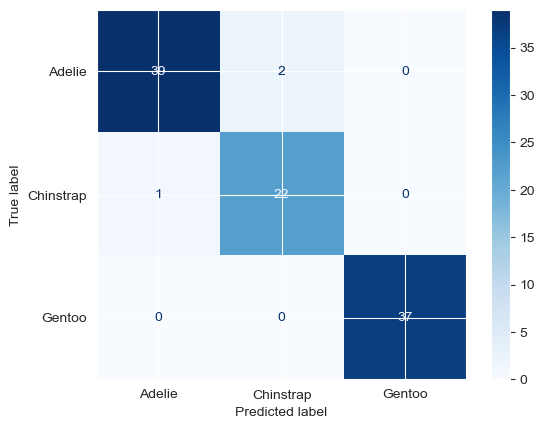

In [41]:
ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test, model_pred),
    display_labels=model_rfc.classes_).plot(cmap='Blues')

In [42]:
print(accuracy_score(y_test, model_pred))

0.9702970297029703


In [43]:
confusion_matrix(y_test, model_pred, labels=['Adelie', 'Chinstrap', 'Gentoo'])

array([[39,  2,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

In [44]:
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [53]:
feature_importance = model_rfc.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance * 100
})

features_df

,Feature,Importance
0,culmen_length_mm,31.867744
1,culmen_depth_mm,10.184870
2,flipper_length_mm,17.343398
3,body_mass_g,21.316964
4,island_Dream,14.512091
5,island_Torgersen,3.720114
6,sex_FEMALE,0.632264
7,sex_MALE,0.422556


In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
test_error = []

for n in range(1, 60):
    model = RandomForestClassifier(
        n_estimators=n,
        max_features='sqrt',
        n_jobs=-1,
    )
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    test_error.append(1 - scores.mean())
    
    # model.fit(X_train, y_train)
    # test_pred = model.predict(X_test)
    # test_error.append(1 - accuracy_score(y_test, test_pred))

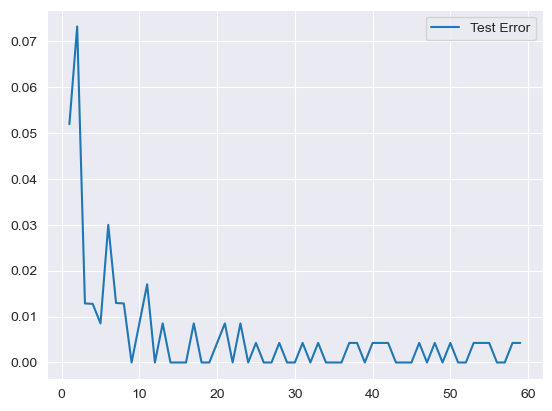

In [68]:
plt.plot(range(1, 60), test_error, label='Test Error')
plt.legend()